# Deaths in Australia due to drowning Analysis Script

### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the cleaned data into Data frames

In [2]:
cause = pd.read_csv('deaths-lt-20.csv')
cause.drop('Unnamed: 0',axis=1,inplace=True)
cause.head()

,year,Gender,AgeGroup,Deaths,DeathRate
0,1979,Males,0–4,50,8.6
1,1979,Males,5–9,13,1.9
2,1979,Males,10–14,8,1.2
3,1979,Males,15–19,27,4.0
4,1979,Females,0–4,46,8.2


In [3]:
#Predefined Function to calculate the ticks and its name for various Axis's
#Based on the min and max values of the array given
def findAxisCordinatesAndNamesForTicks(Values = [],formatValue = 1,divisions = 20,overallMin = -1,overallMax=-1):
    if(overallMin == -1):
        overallMin = Values.agg('min')
    if(overallMax == -1):
        overallMax = Values.agg('max')
    #Finding the y axis label
    axis = []
    axisVariableNames = []
    i = int(overallMin)
    diff = (overallMax - overallMin)/divisions
    if(diff > (int(diff)+ 0.5)):
        diff = int(diff + 1)
    elif(diff > 1):
        diff = int(diff)
    diff = round(diff,2)
    while(i < overallMax + diff):
        i = round(i,2)
        axis.append(i)
        if(formatValue != 1):
            axisVariableNames.append(str(i/formatValue))
        else : 
            axisVariableNames.append(str(i))
        i += diff
    return [axis,axisVariableNames]

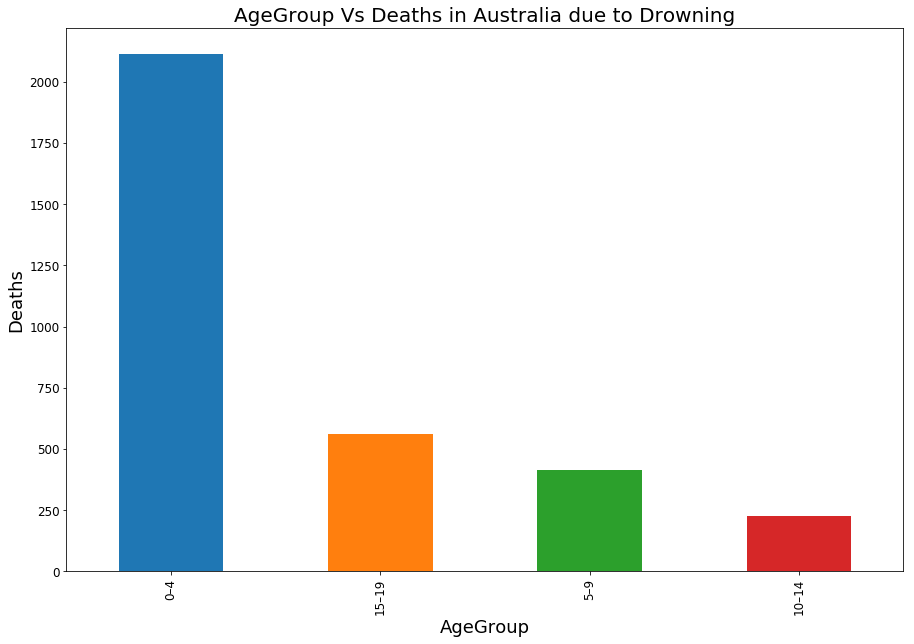

In [4]:
causeGrouped = cause.groupby(['AgeGroup'])['Deaths'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Deaths'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Deaths',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Deaths in Australia due to Drowning',fontsize=20)
plt.show()

In [5]:
#def changeAgeGroup(string):
#    if(string == '5–9'):
#        return '6–9'
#    return string
#cause['AGE_GROUP'] = cause['AGE_GROUP'].apply(changeAgeGroup)

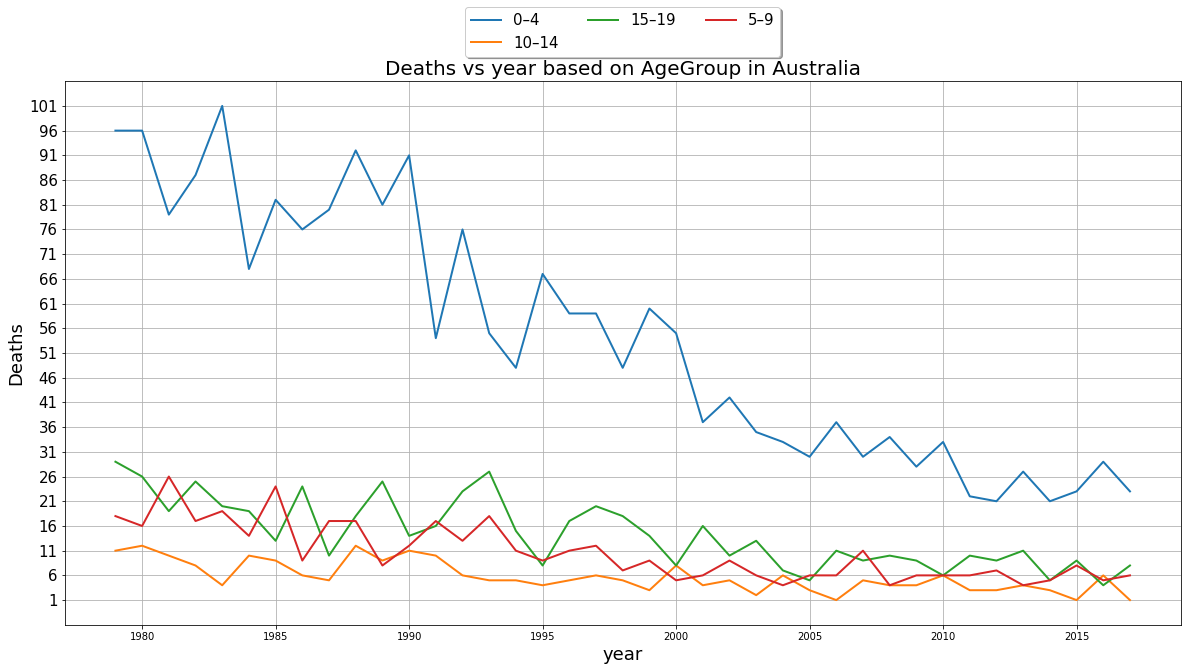

In [6]:
temp = cause[['AgeGroup','year','Deaths']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Deaths'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Deaths, label = ageGroup, linewidth = 2.0)

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Deaths', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Deaths vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

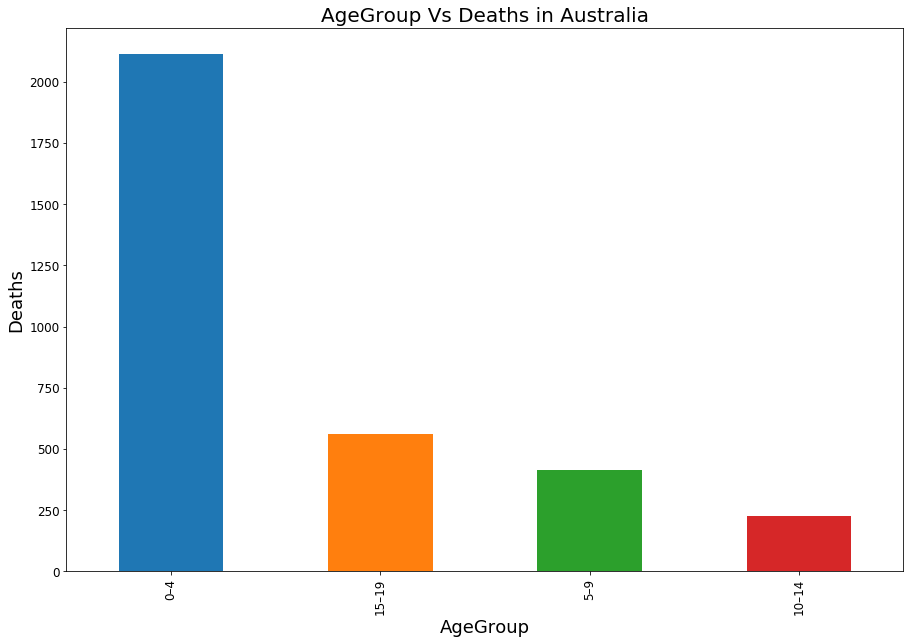

In [7]:
causeGrouped = cause.groupby(['AgeGroup'])['Deaths'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Deaths'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Deaths',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Deaths in Australia',fontsize=20)
plt.show()

## based on Deaths

In [8]:
causeDeaths = cause[['Deaths', 'year', 'Gender', 'AgeGroup']].pivot_table('Deaths', ['year', 'Gender'], 'AgeGroup')
causeDeaths.reset_index(inplace = True)
causeDeaths = pd.melt(causeDeaths ,id_vars=['year','Gender'],var_name='AgeGroup')
causeDeaths.rename(columns = {'value':'Deaths'}, inplace = True)
causeDeaths.head()

,year,Gender,AgeGroup,Deaths
0,1979,Females,0–4,46
1,1979,Males,0–4,50
2,1980,Females,0–4,36
3,1980,Males,0–4,60
4,1981,Females,0–4,24


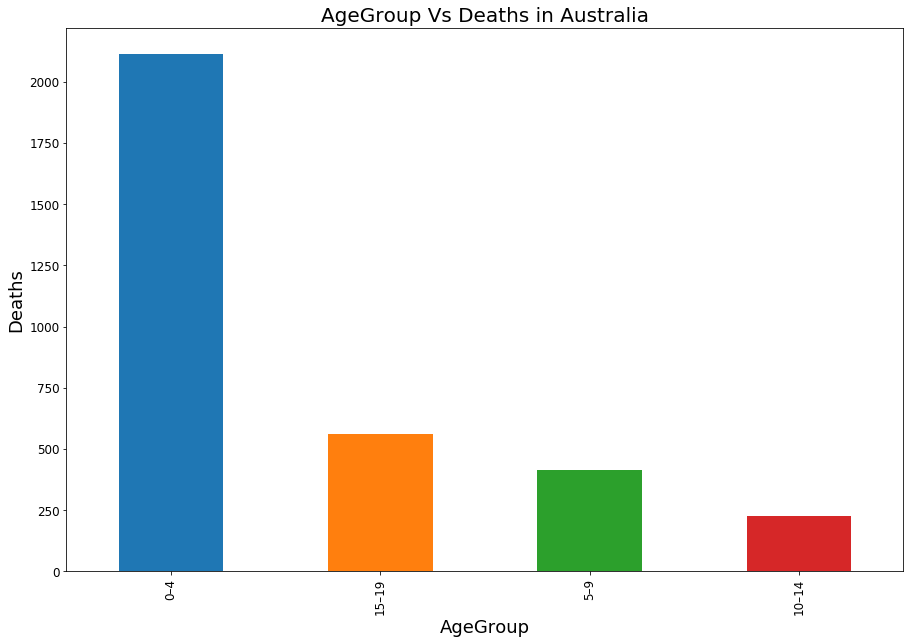

In [9]:
causeGrouped = causeDeaths.groupby(['AgeGroup'])['Deaths'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Deaths'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Deaths',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Deaths in Australia',fontsize=20)
plt.show()

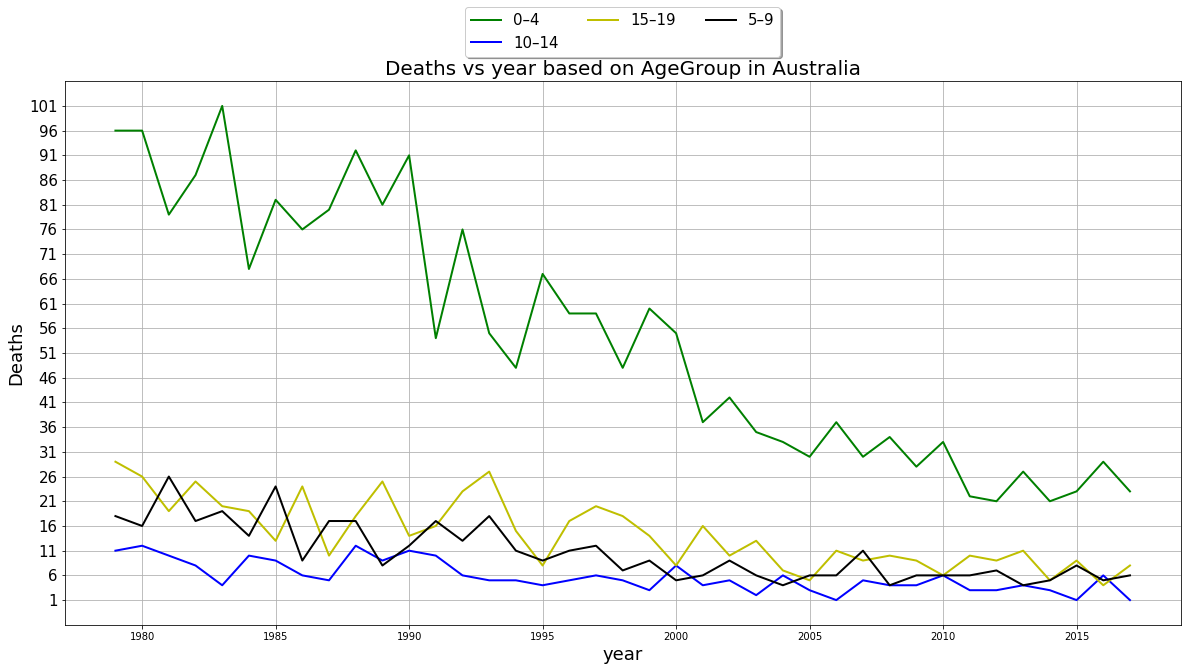

In [10]:
temp = causeDeaths[['AgeGroup','year','Deaths']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Deaths'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Deaths, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Deaths', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Deaths vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

## based on Rate

In [11]:
cause.columns

Index(['year', 'Gender', 'AgeGroup', 'Deaths', 'DeathRate'], dtype='object')

In [12]:
causeRate = cause[['DeathRate', 'year', 'Gender', 'AgeGroup']].pivot_table('DeathRate', ['year', 'Gender'], 'AgeGroup')
causeRate.reset_index(inplace = True)
causeRate = pd.melt(causeRate ,id_vars=['year','Gender'],var_name='AgeGroup')
causeRate.rename(columns = {'value':'DeathRate'}, inplace = True)
causeRate.head()

,year,Gender,AgeGroup,DeathRate
0,1979,Females,0–4,8.2
1,1979,Males,0–4,8.6
2,1980,Females,0–4,6.5
3,1980,Males,0–4,10.3
4,1981,Females,0–4,4.3


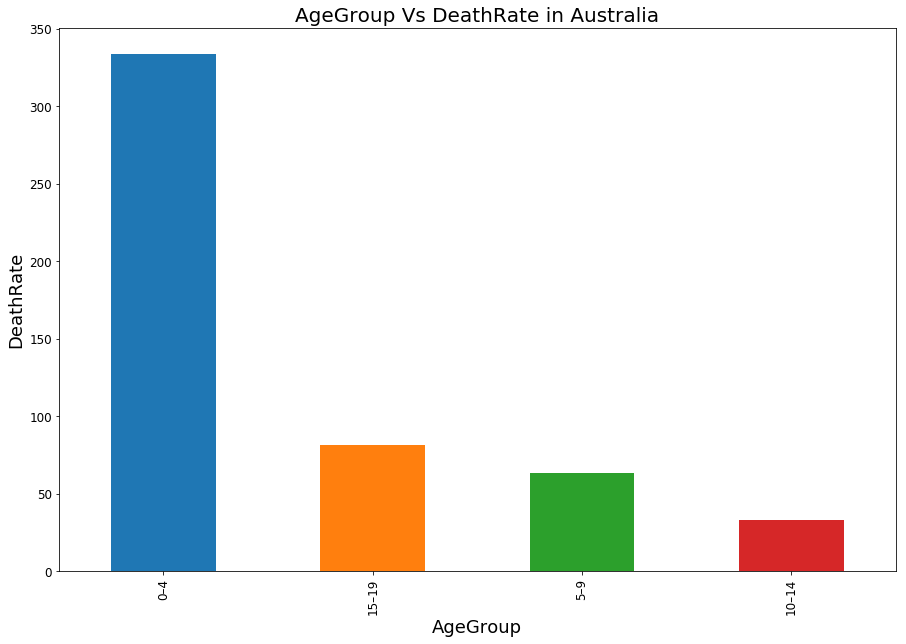

In [13]:
causeGrouped = causeRate.groupby(['AgeGroup'])['DeathRate'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['DeathRate'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='DeathRate',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('DeathRate',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs DeathRate in Australia',fontsize=20)
plt.show()

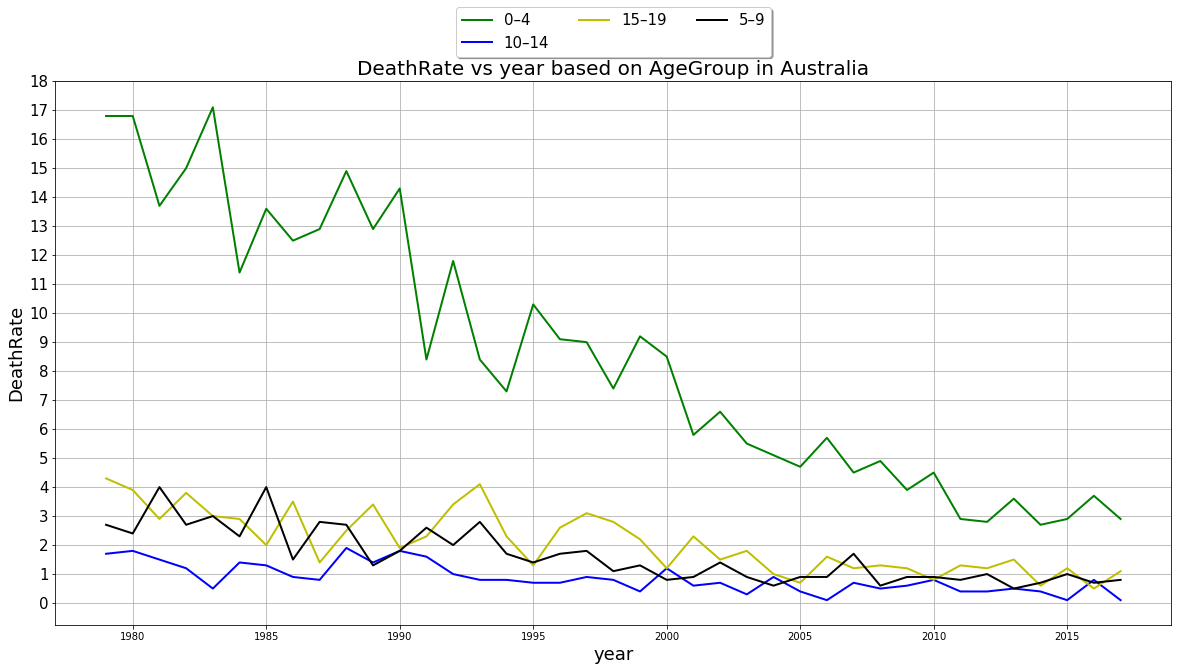

In [14]:
temp = causeRate[['AgeGroup','year','DeathRate']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['DeathRate'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.DeathRate, label = ageGroup, linewidth = 2.0,color=colors[i%6])

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('DeathRate', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('DeathRate vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

In [15]:
causeRate.AgeGroup.unique()

array(['0–4', '10–14', '15–19', '5–9'], dtype=object)

## Increase or decrease in %

### Based on Deaths

There is a -62.5 % increase from base value (1980) and -43.48 % increase from overall year average
There is a -45.45 % increase from base value (2007) and -2.94 % increase from past 10 year average
There is a -14.29 % increase from base value (2007) and 2.86 % increase from past 5 year average


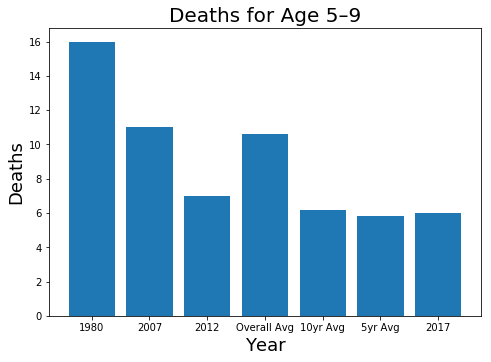

In [18]:
causeDeaths2007Above = causeDeaths[(causeDeaths['year'] >= 2007)]
causeDeaths2012Above = causeDeaths[(causeRate['year'] >= 2012)]
Injuries1980 = causeDeaths[(causeDeaths['year'] == 1980) & (causeDeaths['AgeGroup'] =='5–9')]['Deaths'].agg('sum')
Injuries2007 = causeDeaths[(causeDeaths['year'] == 2007) & (causeDeaths['AgeGroup'] =='5–9')]['Deaths'].agg('sum')
Injuries2012 = causeDeaths[(causeDeaths['year'] == 2012) & (causeDeaths['AgeGroup'] =='5–9')]['Deaths'].agg('sum')
InjuriesAvg = (causeDeaths[(causeDeaths['AgeGroup'] =='5–9')]['Deaths'].agg('sum'))/len(causeDeaths['year'].unique())
Injuries10Avg = (causeDeaths2007Above[(causeDeaths2007Above['AgeGroup'] =='5–9')]['Deaths'].agg('sum'))/len(causeDeaths2007Above['year'].unique())
Injuries5Avg = (causeDeaths2012Above[(causeDeaths2012Above['AgeGroup'] =='5–9')]['Deaths'].agg('sum'))/len(causeDeaths2012Above['year'].unique())
Injuries2017 = causeDeaths[(causeDeaths['year'] == 2017) & (causeDeaths['AgeGroup'] =='5–9')]['Deaths'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries1980)*100/Injuries1980
Base10Increase = (Injuries2017 - Injuries2007)*100/Injuries2007
Base5Increase = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
Avg5Increase = (Injuries2017 - Injuries5Avg)*100/Injuries5Avg
Avg10Increase = (Injuries2017 - Injuries10Avg)*100/Injuries10Avg
print("There is a",round(BaseIncrease,2),"% increase from base value (1980) and",round(AvgIncrease,2),"% increase from overall year average")
print("There is a",round(Base10Increase,2),"% increase from base value (2007) and",round(Avg10Increase,2),"% increase from past 10 year average")
print("There is a",round(Base5Increase,2),"% increase from base value (2007) and",round(Avg5Increase,2),"% increase from past 5 year average")
Injuries = [Injuries1980,Injuries2007,Injuries2012,InjuriesAvg,Injuries10Avg,Injuries5Avg,Injuries2017]
InjuriesColName = ['1980','2007','2012','Overall Avg','10yr Avg','5yr Avg','2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.title('Deaths for Age 5–9',fontsize=20)
plt.show()

#### 2.86 % increase in deaths on 2017 from past 5 year average

### Based on  Death Rate

There is a -66.67 % increase from base value (1980) and -50.94 % increase from overall year average
There is a -52.94 % increase from base value (2007) and -8.33 % increase from past 10 year average
There is a -20.0 % increase from base value (2007) and 2.13 % increase from past 5 year average


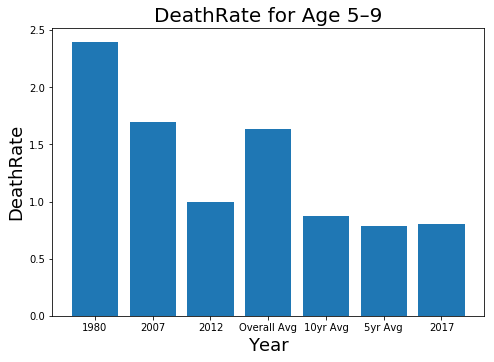

In [20]:
causeRate2007Above = causeRate[(causeRate['year'] >= 2007)]
causeRate2012Above = causeRate[(causeRate['year'] >= 2012)]
Injuries1980 = causeRate[(causeRate['year'] == 1980) & (causeRate['AgeGroup'] =='5–9')]['DeathRate'].agg('sum')
Injuries2007 = causeRate[(causeRate['year'] == 2007) & (causeRate['AgeGroup'] =='5–9')]['DeathRate'].agg('sum')
Injuries2012 = causeRate[(causeRate['year'] == 2012) & (causeRate['AgeGroup'] =='5–9')]['DeathRate'].agg('sum')
InjuriesAvg = (causeRate[(causeRate['AgeGroup'] =='5–9')]['DeathRate'].agg('sum'))/len(causeRate['year'].unique())
Injuries10Avg = (causeRate2007Above[(causeRate2007Above['AgeGroup'] =='5–9')]['DeathRate'].agg('sum'))/len(causeRate2007Above['year'].unique())
Injuries5Avg = (causeRate2012Above[(causeRate2012Above['AgeGroup'] =='5–9')]['DeathRate'].agg('sum'))/len(causeRate2012Above['year'].unique())
Injuries2017 = causeRate[(causeRate['year'] == 2017) & (causeRate['AgeGroup'] =='5–9')]['DeathRate'].agg('sum')
BaseIncrease = (Injuries2017 - Injuries1980)*100/Injuries1980
Base10Increase = (Injuries2017 - Injuries2007)*100/Injuries2007
Base5Increase = (Injuries2017 - Injuries2012)*100/Injuries2012
AvgIncrease = (Injuries2017 - InjuriesAvg)*100/InjuriesAvg
Avg10Increase = (Injuries2017 - Injuries10Avg)*100/Injuries10Avg
Avg5Increase = (Injuries2017 - Injuries5Avg)*100/Injuries5Avg
print("There is a",round(BaseIncrease,2),"% increase from base value (1980) and",round(AvgIncrease,2),"% increase from overall year average")
print("There is a",round(Base10Increase,2),"% increase from base value (2007) and",round(Avg10Increase,2),"% increase from past 10 year average")
print("There is a",round(Base5Increase,2),"% increase from base value (2007) and",round(Avg5Increase,2),"% increase from past 5 year average")
Injuries = [Injuries1980,Injuries2007,Injuries2012,InjuriesAvg,Injuries10Avg,Injuries5Avg,Injuries2017]
InjuriesColName = ['1980','2007','2012','Overall Avg','10yr Avg','5yr Avg','2017']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(InjuriesColName,Injuries)
plt.ylabel('DeathRate',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.title('DeathRate for Age 5–9',fontsize=20)
plt.show()

#### 2.13 % increase in DeathRate on 2017 from past 5 year average

### Past 10 year plots Based on deaths

In [21]:
causeDeaths2007Above = causeDeaths[(causeDeaths['year'] >= 2007)]

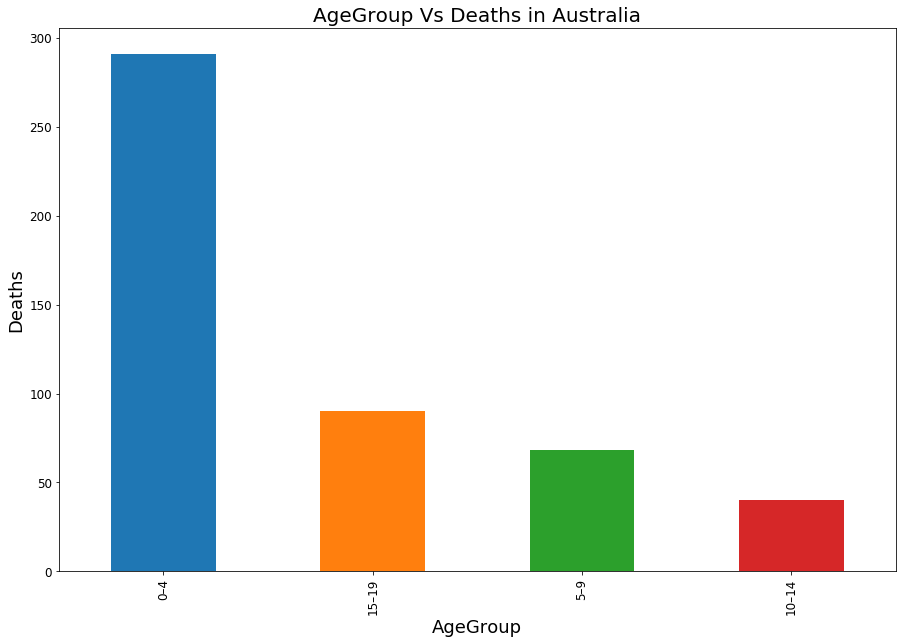

In [22]:
causeGrouped = causeDeaths2007Above.groupby(['AgeGroup'])['Deaths'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Deaths'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Deaths',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AgeGroup',fontsize=18)
plt.title('AgeGroup Vs Deaths in Australia',fontsize=20)
plt.show()

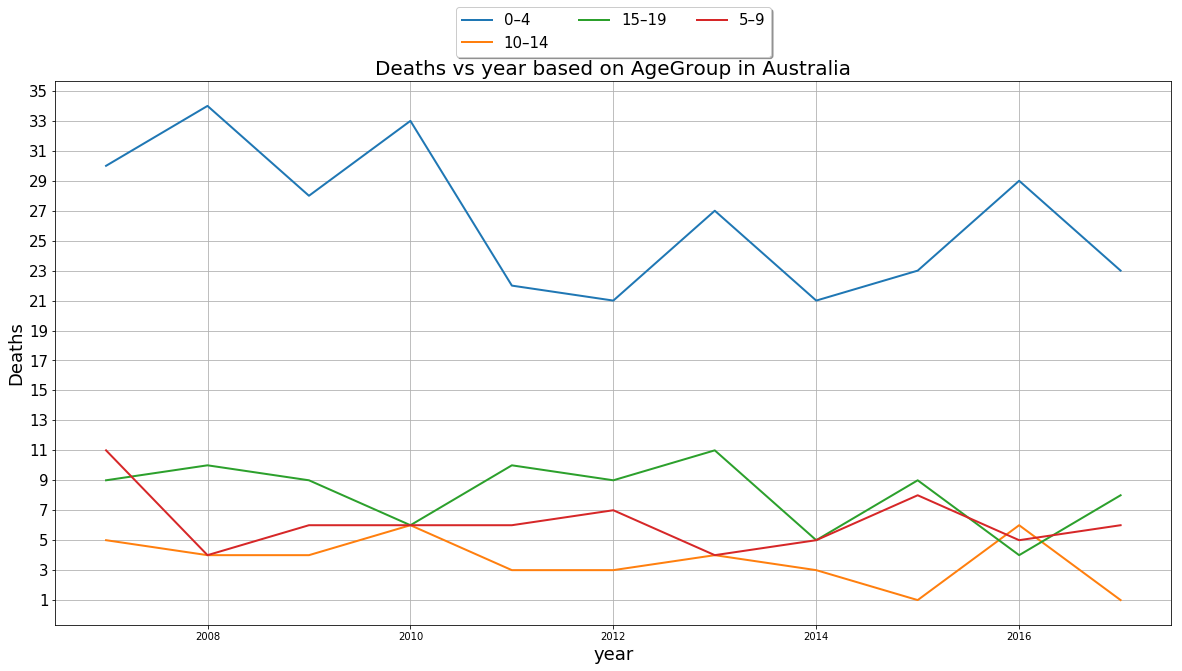

In [23]:
temp = causeDeaths2007Above[['AgeGroup','year','Deaths']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Deaths'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Deaths, label = ageGroup, linewidth = 2.0)

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Deaths', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Deaths vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

### Past 5years plots

In [24]:
causeRate2012Above.columns

Index(['year', 'Gender', 'AgeGroup', 'DeathRate'], dtype='object')

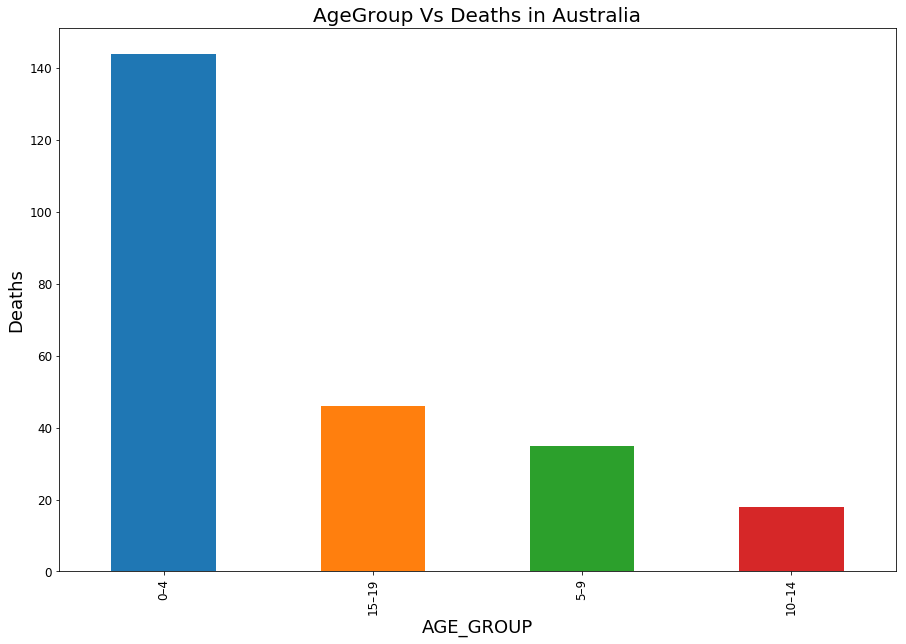

In [25]:
causeGrouped = causeDeaths2012Above.groupby(['AgeGroup'])['Deaths'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['Deaths'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='Deaths',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('Deaths',fontsize=18)
plt.xlabel('AGE_GROUP',fontsize=18)
plt.title('AgeGroup Vs Deaths in Australia',fontsize=20)
plt.show()


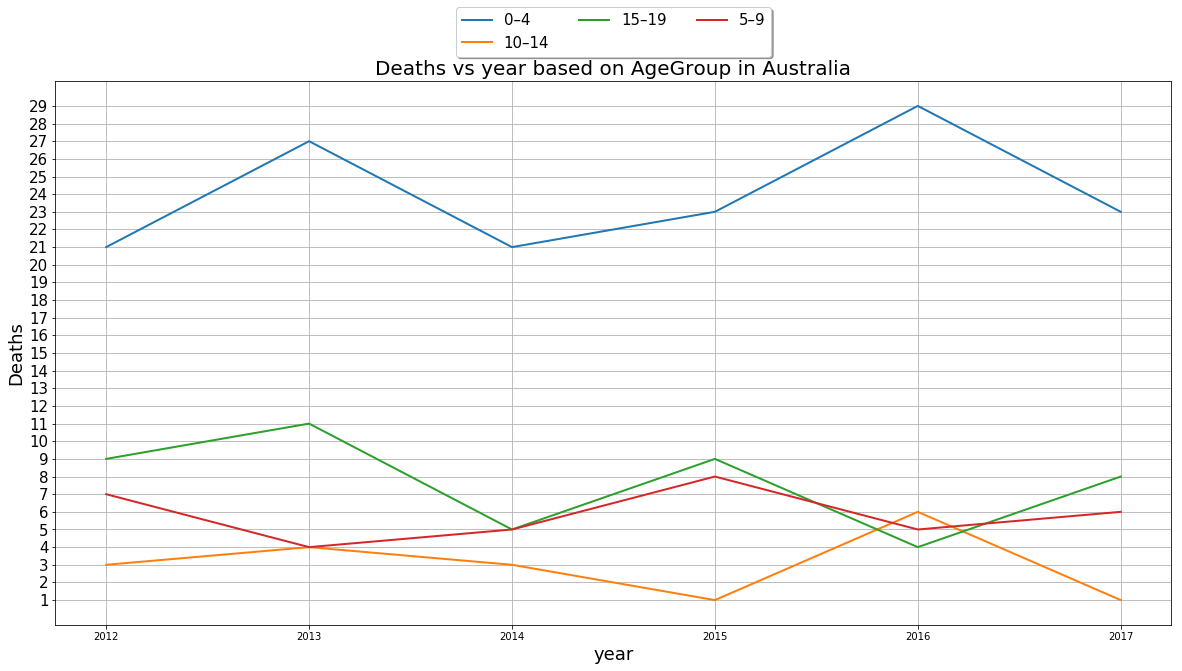

In [27]:
temp = causeDeaths2012Above[['AgeGroup','year','Deaths']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['Deaths'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.Deaths, label = ageGroup, linewidth = 2.0)

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('Deaths', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('Deaths vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

### Past 10 year plots for death Rate

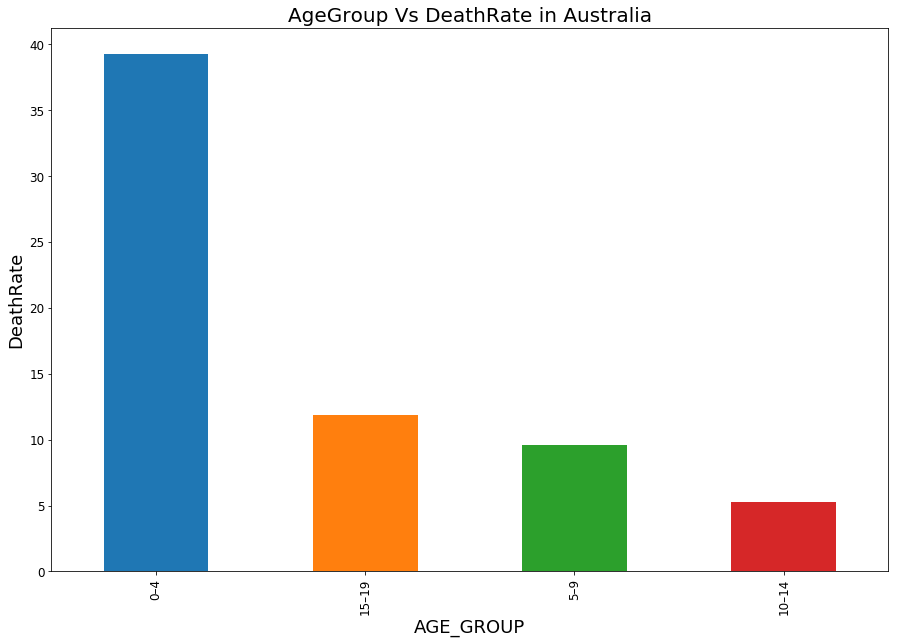

In [28]:
causeGrouped = causeRate2007Above.groupby(['AgeGroup'])['DeathRate'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['DeathRate'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='DeathRate',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('DeathRate',fontsize=18)
plt.xlabel('AGE_GROUP',fontsize=18)
plt.title('AgeGroup Vs DeathRate in Australia',fontsize=20)
plt.show()

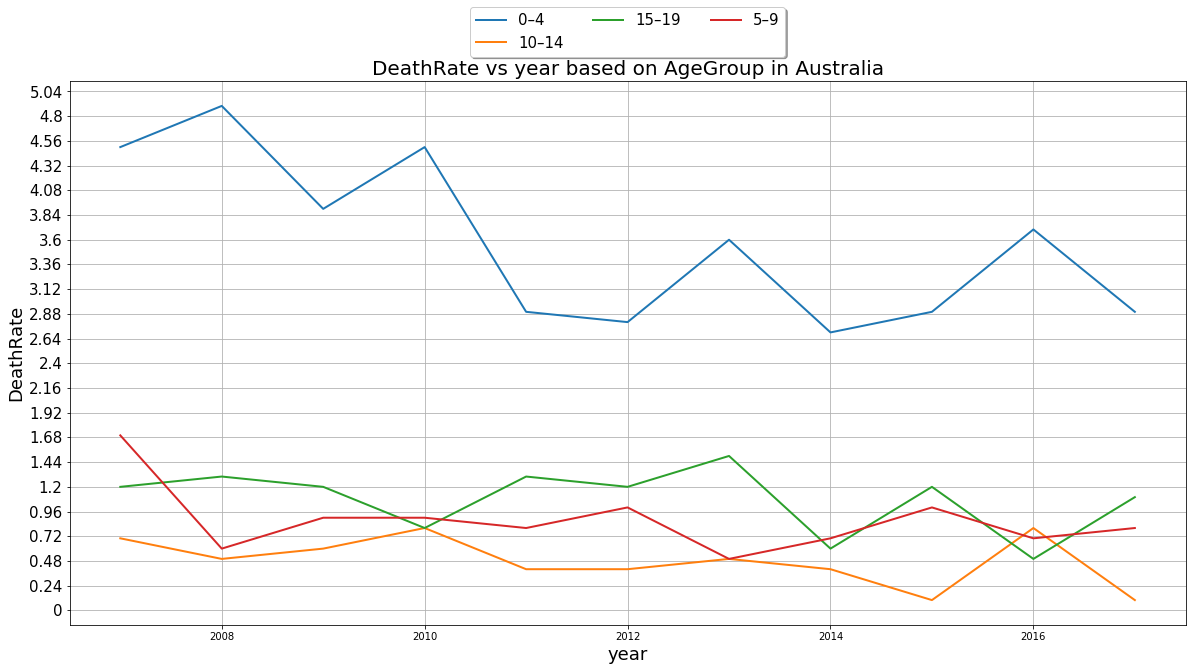

In [29]:
temp = causeRate2007Above[['AgeGroup','year','DeathRate']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['DeathRate'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.DeathRate, label = ageGroup, linewidth = 2.0)

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('DeathRate', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('DeathRate vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()

### Past 5years plots for Death Rate


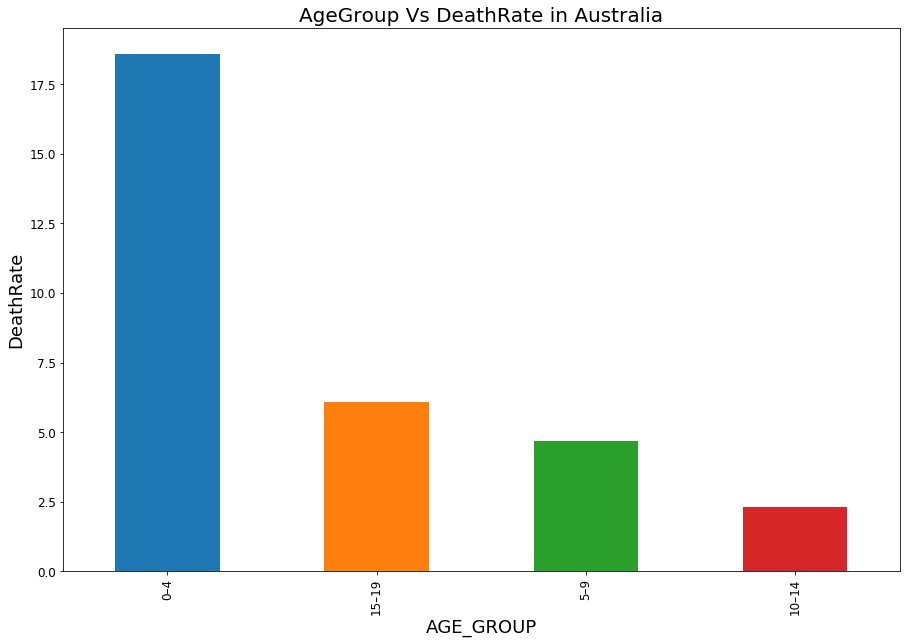

In [30]:
causeGrouped = causeRate2012Above.groupby(['AgeGroup'])['DeathRate'].agg('sum').reset_index()
causeGrouped = causeGrouped.sort_values(by=['DeathRate'],ascending =False)
causeGrouped.plot.bar(x='AgeGroup',y='DeathRate',figsize=(15, 10),fontsize=12,legend=None)
plt.ylabel('DeathRate',fontsize=18)
plt.xlabel('AGE_GROUP',fontsize=18)
plt.title('AgeGroup Vs DeathRate in Australia',fontsize=20)
plt.show()

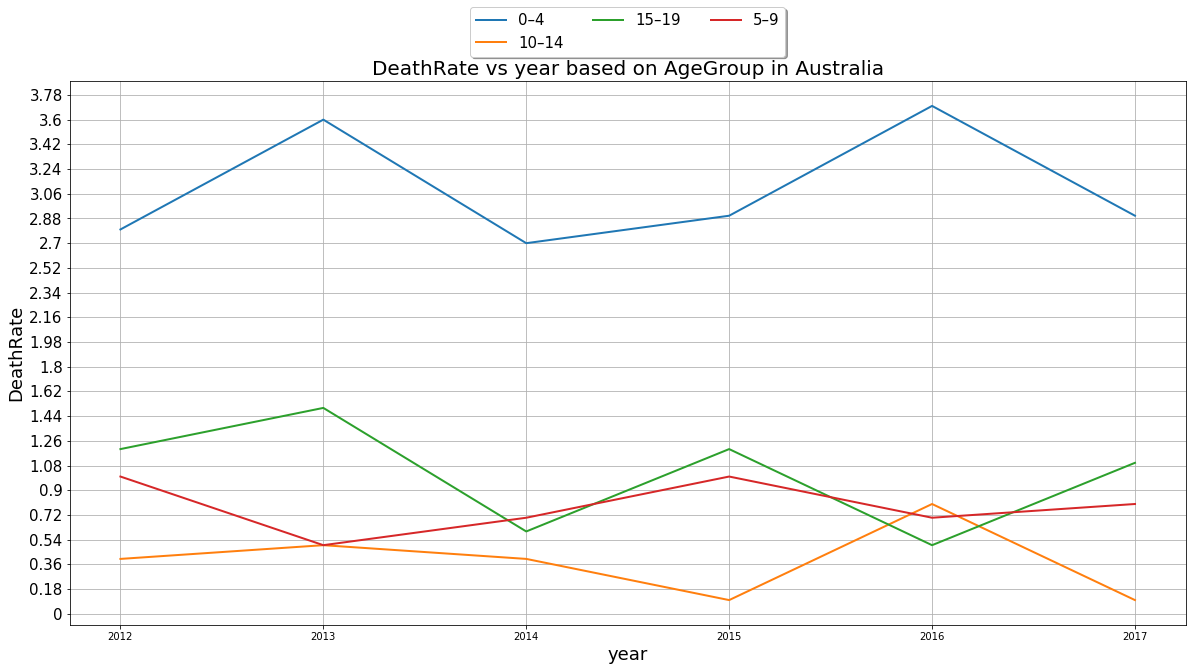

In [31]:
temp = causeRate2012Above[['AgeGroup','year','DeathRate']].groupby(['AgeGroup','year']).agg('sum').reset_index()
groupedInfo = temp.groupby('AgeGroup')

yAxis, yAxisVariableNames = findAxisCordinatesAndNamesForTicks(temp['DeathRate'])
colors = ['r','g','b','y','k','lime']

#Finding the x axis label
ticks = findAxisCordinatesAndNamesForTicks(cause['year'],divisions = 10)
xAxis = ticks[0]
xAxisVariableNames =ticks[1]  

plt.figure(figsize = (20,10))

i=0
for ageGroup,info in groupedInfo:
    i+=1
    plt.plot(info.year,info.DeathRate, label = ageGroup, linewidth = 2.0)

#plt.xticks(xAxis, xAxisVariableNames, rotation = 45, fontsize = 15)
plt.yticks(yAxis, yAxisVariableNames, fontsize = 15)

plt.ylabel('DeathRate', fontsize=18)
plt.xlabel('year', fontsize=18)
plt.title('DeathRate vs year based on AgeGroup in Australia', fontsize=20)
plt.legend(loc= 'upper center', ncol=3, fancybox = True, shadow = True, bbox_to_anchor = (0.5, 1.15), fontsize = 15)

plt.grid()
plt.show()